In [11]:
import pandas as pd

df = pd.read_csv('grades.csv')

print(df)


         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0
22       Bill        8.00    NaN
23        Ted         NaN    NaN


In [15]:
# drop any rows with missing data
df.dropna(inplace=True)
print(df)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0


Matplotlib is building the font cache; this may take a moment.


array([[<Axes: title={'center': 'StudyHours'}>,
        <Axes: title={'center': 'Grade'}>]], dtype=object)

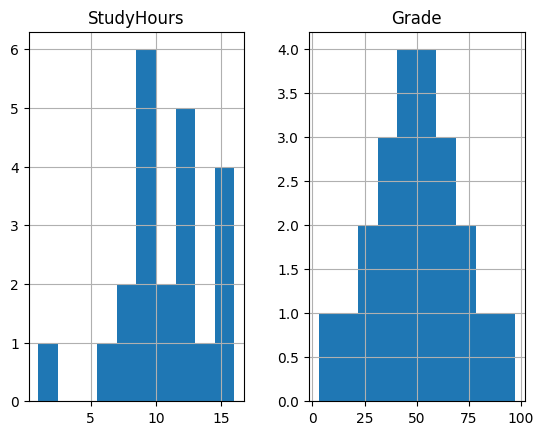

In [13]:
# display the data in a histogram
df.hist()

<Axes: >

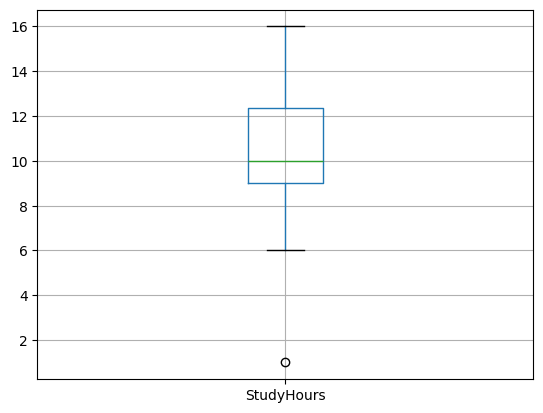

In [16]:
# create a boxplot for study hours
df.boxplot(column='StudyHours')

<Axes: >

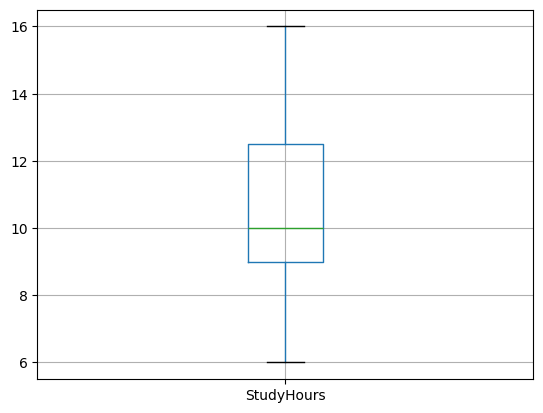

In [17]:
# drop any outlying valuesin StudyHours
df = df[df['StudyHours'] > 1]
df.boxplot(column='StudyHours')

In [27]:
# normalize study hours on a 100-point scale
df['StudyHours100'] = df['StudyHours'] / (df['StudyHours'].max() / 100)
print(df)

         Name  StudyHours  Grade  StudyHours100
0         Dan       10.00   50.0        62.5000
1       Joann       11.50   50.0        71.8750
2       Pedro        9.00   47.0        56.2500
3       Rosie       16.00   97.0       100.0000
4       Ethan        9.25   49.0        57.8125
6    Frederic       11.50   53.0        71.8750
7      Jimmie        9.00   42.0        56.2500
8      Rhonda        8.50   26.0        53.1250
9    Giovanni       14.50   74.0        90.6250
10  Francesca       15.50   82.0        96.8750
11      Rajab       13.75   62.0        85.9375
12    Naiyana        9.00   37.0        56.2500
13       Kian        8.00   15.0        50.0000
14      Jenny       15.50   70.0        96.8750
15     Jakeem        8.00   27.0        50.0000
16     Helena        9.00   36.0        56.2500
17      Ismat        6.00   35.0        37.5000
18      Anila       10.00   48.0        62.5000
19       Skye       12.00   52.0        75.0000
20     Daniel       12.50   63.0        

/var/folders/x5/769wc79s705c2cqq_hjq4k800000gn/T/ipykernel_85264/287753749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StudyHours100'] = df['StudyHours'] / (df['StudyHours'].max() / 100)


<Axes: xlabel='Name'>

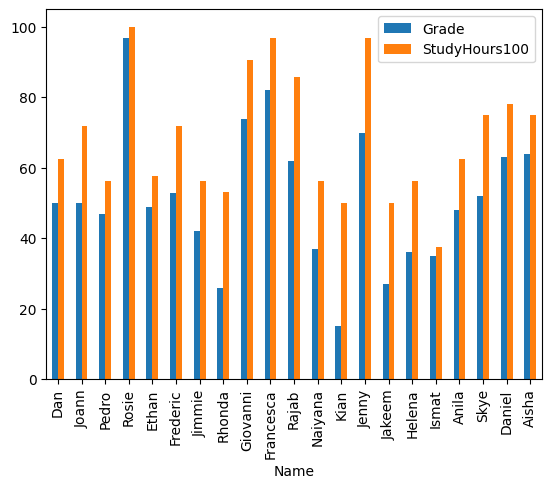

In [28]:
# bar chart for grades and study hours with students on x axis
df.plot(x='Name', y=['Grade', 'StudyHours100'], kind='bar')

<Axes: xlabel='StudyHours', ylabel='Grade'>

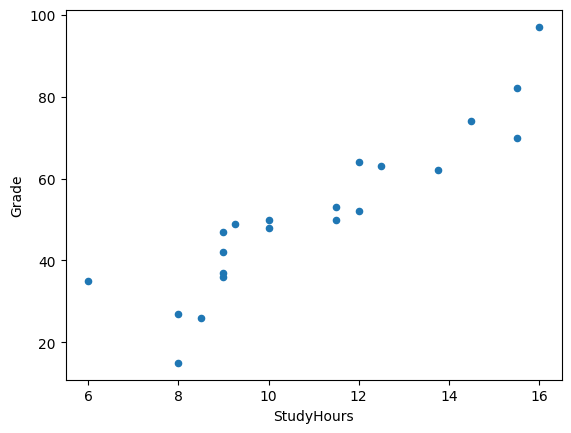

In [29]:
# scatter plot with llinear regrassion line for study hours and grade
df.plot(x='StudyHours', y='Grade', kind='scatter')

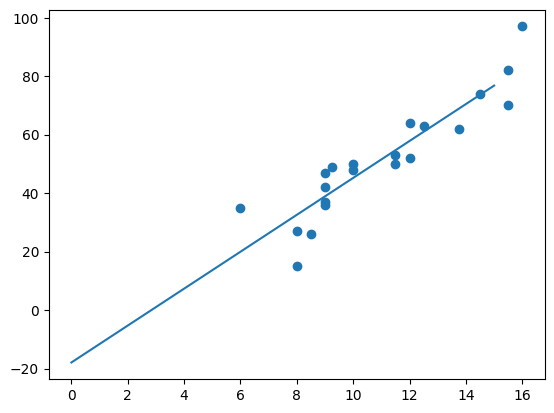

In [30]:
# draw a line of best fit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# create a linear regression model
model = LinearRegression()

# fit the model with the original data
model.fit(df['StudyHours'].values.reshape(-1, 1), df['Grade'])

# create a series of new data points for prediction
newdata = pd.Series([x for x in range(0, 16)])

# predict the grades
result = model.predict(newdata.values.reshape(-1, 1))

# plot the data points
plt.scatter(df['StudyHours'], df['Grade'])

# plot the line of best fit
plt.plot(newdata, result)

# display the plot
plt.show()

In [32]:
# predict the grade for a student based on hours studied

hours = 16
predicted = model.predict([[hours]])

print(predicted)

[83.09840021]


In [33]:
# how many hours do i need to study to get 100
hours = (100 - model.intercept_) / model.coef_[0]
print(hours)

18.677088600152857
